In [1]:
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

In [2]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def make_basis_state(basis_id):
    #Convert input to binary
    basis_id_binary = np.base_repr(basis_id).zfill(3)
    
    #Convert binary string to list
    list_1 = list(basis_id_binary)
    
    #Convert list to integer values
    final_list = [int(x) for x in list_1]

    #Prepare the correct computational basis state
    for i in range(len(final_list)):
        if final_list[i] == 1:
            qml.PauliX(wires=i)
    return qml.state()

basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")

Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [3]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def two_qubit_circuit():

    # Prepare |+>|1>
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)

    # Return the expected values 
    return (qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1)))

print(two_qubit_circuit())

(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


In [4]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def create_one_minus():
    # Prepare |1>|->
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)

    # Return expected value of Z \otimes X
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))

print(create_one_minus())

0.9999999999999996


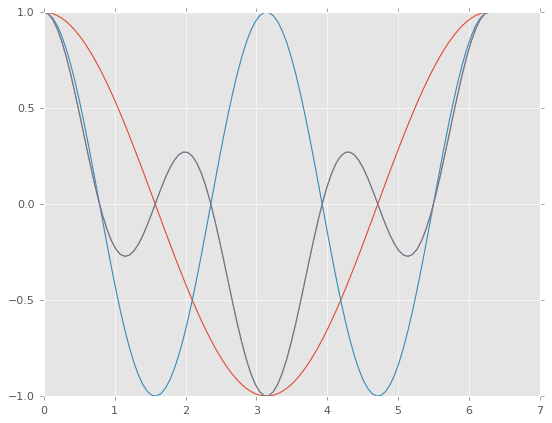

In [5]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit_1(theta):
    qml.RX(theta, wires=0)
    qml.RY(2 * theta, wires=1)

    # Return expected value of Z \otimes I and I \otimes Z 
    return (qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)))


@qml.qnode(dev)
def circuit_2(theta):
    qml.RX(theta, wires=0)
    qml.RY(2 * theta, wires=1)
    
    # Return expected value of Z \otimes Z
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))


def zi_iz_combination(ZI_results, IZ_results):
    
    combined_results = np.zeros(len(ZI_results))
    return ZI_results * IZ_results

 
theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

#plot style
plt.style.use('ggplot')

# Plot your results
plt.plot(theta, ZI_results)
plt.plot(theta, IZ_results) 
plt.plot(theta, ZZ_results)
plt.plot(theta, combined_results)
plt.show()